In [1]:
#Setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 5.1 MB/s 


In [19]:
pip install twelvedata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.9 MB/s 


In [24]:
api_key = '79b2c84f78d34c8f97efe50deaed34e2'

symbol= 'BTC/USD'
interval= '1 day'
order= 'asc'

In [25]:
end_date= 2021,12,31
strat_date= 2017,1,1

In [38]:
api_url= f'https://api.twelvedata.com/time_series?apikey=79b2c84f78d34c8f97efe50deaed34e2&interval=1day&symbol=BTC/USD&start_date=2017-01-01 00:00:00&end_date=2021-12-31 00:00:00&format=JSON'

In [39]:
data= requests.get(api_url).json()

In [40]:
data_final = pd.DataFrame(data['values'])

In [41]:
data_final

,datetime,open,high,low,close
0,2021-12-31,47122.08984,48574.03125,45655.42969,46197.60938
1,2021-12-30,46471.23828,47917.25000,45984.87109,47122.07812
2,2021-12-29,47536.46875,48148.03906,46103.96875,46471.32031
3,2021-12-28,50717.76953,50717.76953,47315.26953,47534.07031
4,2021-12-27,50807.57812,52084.00000,50480.01172,50717.82031
...,...,...,...,...,...
226,2021-05-19,42857.14844,43583.76953,30288.16016,36721.16016
227,2021-05-18,43573.51953,45814.44922,42335.17969,42878.75000
228,2021-05-17,46455.37109,46610.17188,42173.01172,43552.78125
229,2021-05-16,46775.80078,49770.16016,43919.92188,46440.67188


In [42]:
data_final['close']= pd.to_numeric(data_final['close'], errors= 'coerce')
data_final.set_index('datetime', inplace= True)

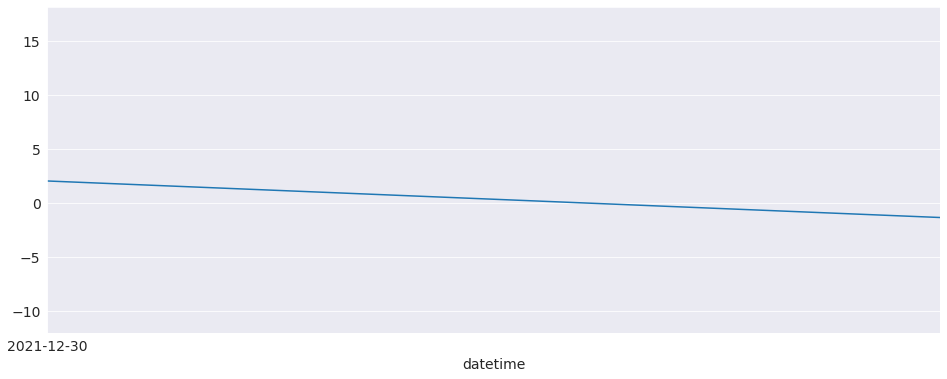

In [43]:
import datetime as dt
data = data_final
market = data_final["close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [44]:
#GARCH (with a Constant Mean)
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     32,   Neg. LLF: 642.0434700123897
Iteration:     10,   Func. Count:     57,   Neg. LLF: 658.445952482085
Iteration:     15,   Func. Count:     85,   Neg. LLF: 642.8151450832023
Optimization terminated successfully    (Exit mode 0)
            Current function value: 641.1925842016581
            Iterations: 16
            Function evaluations: 89
            Gradient evaluations: 15
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -641.193
Distribution:                  Normal   AIC:                           1290.39
Method:            Maximum Likelihood   BIC:                           1304.14
                                        No. Observations:                  230
Date:                Th

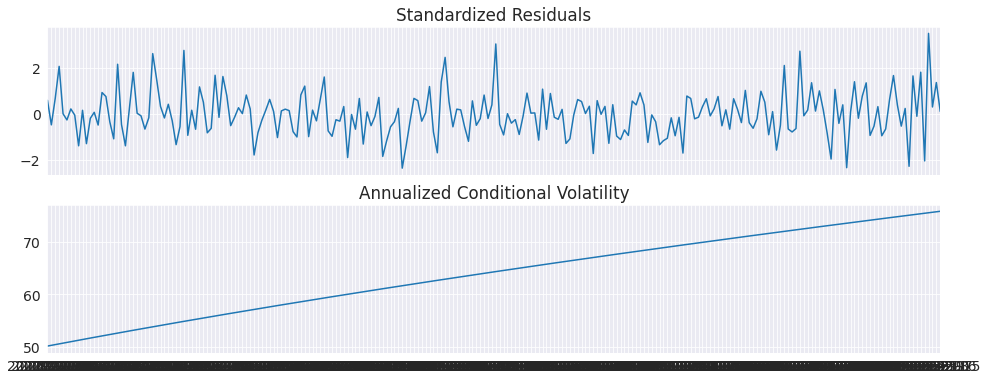

In [45]:
# can be used to quickly visualize the standardized residuals and conditional volatility
fig = res.plot(annualize="D")

In [46]:
#GJR-GARCH
am = arch_model(returns, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -640.610
Distribution:                  Normal   AIC:                           1291.22
Method:            Maximum Likelihood   BIC:                           1308.41
                                        No. Observations:                  230
Date:                Thu, Sep 29 2022   Df Residuals:                      229
Time:                        11:49:28   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0613      0.258      0.238      0.812 [ -0.443,  0.56

In [47]:
#TARCH/ZARCH
am = arch_model(returns, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     40,   Neg. LLF: 649.3521934819462
Iteration:     10,   Func. Count:     74,   Neg. LLF: 641.5567001653776
Iteration:     15,   Func. Count:    103,   Neg. LLF: 641.5439752310566
Optimization terminated successfully    (Exit mode 0)
            Current function value: 641.5439752310178
            Iterations: 15
            Function evaluations: 103
            Gradient evaluations: 15
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -641.544
Distribution:                  Normal   AIC:                           1293.09
Method:            Maximum Likelihood   BIC:                           1310.28
                                        No. Observations:                  230
Date:                

In [48]:
# Student’s T Errors
am = arch_model(returns, p=1, o=1, q=1, power=1.0, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     45,   Neg. LLF: 641.7938367600327
Iteration:     10,   Func. Count:     85,   Neg. LLF: 639.0477308600134
Iteration:     15,   Func. Count:    122,   Neg. LLF: 638.8208088526792
Optimization terminated successfully    (Exit mode 0)
            Current function value: 638.8195960637984
            Iterations: 19
            Function evaluations: 150
            Gradient evaluations: 19
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                        close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -638.820
Distribution:      Standardized Student's t   AIC:                           1289.64
Method:                  Maximum Likelihood   BIC:                           1310.27
                                              No. Observations: 

In [49]:
# Fixing Parameters
fixed_res = am.fix([0.0235, 0.01, 0.06, 0.0, 0.9382, 8.0])
print(fixed_res.summary())

                      Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         close   R-squared:                          --
Mean Model:                    Constant Mean   Adj. R-squared:                     --
Vol Model:                       TARCH/ZARCH   Log-Likelihood:               -660.127
Distribution:       Standardized Student's t   AIC:                           1332.25
Method:            User-specified Parameters   BIC:                           1352.88
                                               No. Observations:                  230
Date:                       Thu, Sep 29 2022                                         
Time:                               11:51:34                                         
      Mean Model     
                 coef
---------------------
mu             0.0235
   Volatility Model  
                 coef
---------------------
omega          0.0100
alpha[1]       0.0600
gamma[1]       0.0000
beta[1

(0.0, 1.0)

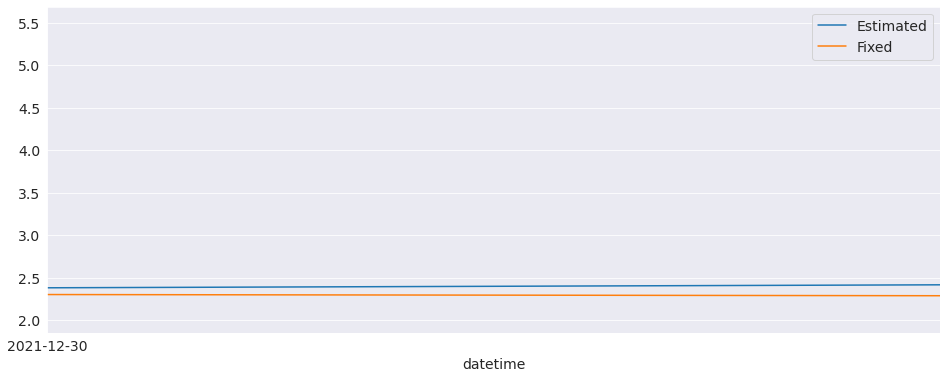

In [50]:
import pandas as pd

df = pd.concat([res.conditional_volatility, fixed_res.conditional_volatility], 1)
df.columns = ["Estimated", "Fixed"]
subplot = df.plot()
subplot.set_xlim(xlim)